# Chloé's Work 

In [5]:
import pandas as pd
import plotly as plt
import plotly.express as px
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

Importation des modules nécessaires

## Exploratory Data Analysis

Exoloratory Data Analysis is an important step in Data Analysis.

### Data Summarization

In [10]:
data = pd.read_csv("OneDrive - Sup'Biotech/Documents/Biotech 4/ESME/Projet ML Syndrome métabolique/Metabolic_Syndrom_Project/Metabolic Syndrome.csv", index_col="seqn")
data["MetabolicSyndrome"] = data["MetabolicSyndrome"].astype("bool")
data_shape = data.shape
categorical_variables = ["Sex", "Marital", "Race"]
print(f"info : \n{data.info()}\n describe: \n{data.describe(include='all')}\n  sum of NaN : \n{data.isnull().sum()}\n")

<class 'pandas.core.frame.DataFrame'>
Index: 2401 entries, 62161 to 71915
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   object 
 2   Marital            2193 non-null   object 
 3   Income             2284 non-null   float64
 4   Race               2401 non-null   object 
 5   WaistCirc          2316 non-null   float64
 6   BMI                2375 non-null   float64
 7   Albuminuria        2401 non-null   int64  
 8   UrAlbCr            2401 non-null   float64
 9   UricAcid           2401 non-null   float64
 10  BloodGlucose       2401 non-null   int64  
 11  HDL                2401 non-null   int64  
 12  Triglycerides      2401 non-null   int64  
 13  MetabolicSyndrome  2401 non-null   bool   
dtypes: bool(1), float64(5), int64(5), object(3)
memory usage: 265.0+ KB
info : 
None
 describe: 
                Age     Sex

Our dataset has 14 variables, 3 categorical and ordinal (Sex, Marital Status and Race), and 11 numerical (Age, Income, Waist Circumference, BMI, Albuminuria, UrAlbCr, Uric Acid, Blood Glucose Concentration, HDL, Tryglycerides and MetabolicSyndrome) variables.

- Nominal variables : Marital Status, Sex, Race
- Numerical discrete variables : Age, Albuminuria, Blood Glucose, HDL, Triglycerides 
- Numerical continuous variables : Income, Waist circumference, BMI, Urinary albumin-to-creatinine ratio and Uric acid levels in the blood
#### Data Visualisation

##### Histograms of Nominal variables

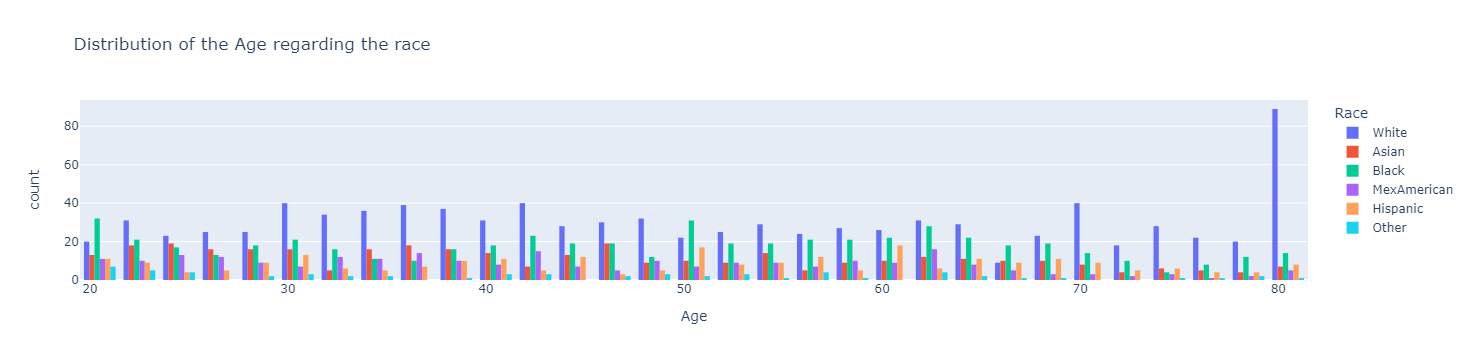

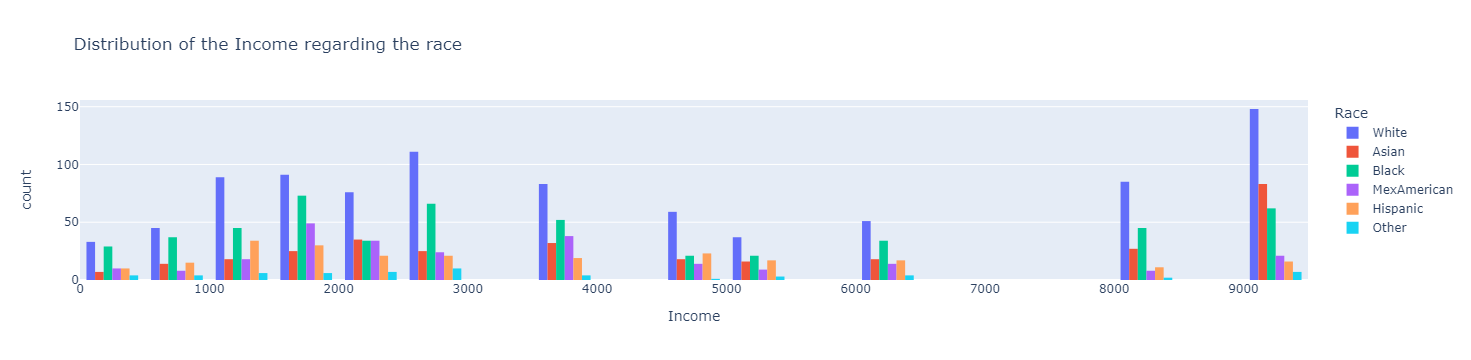

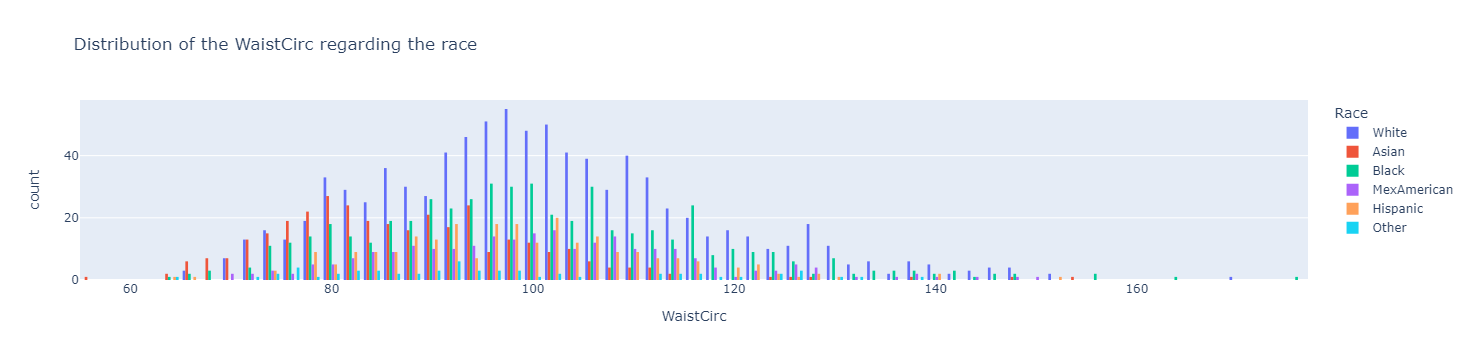

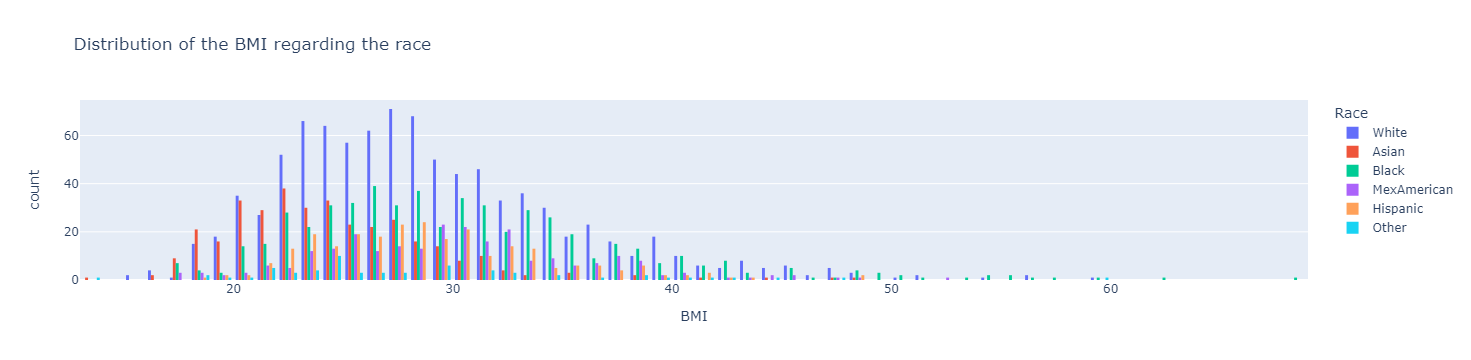

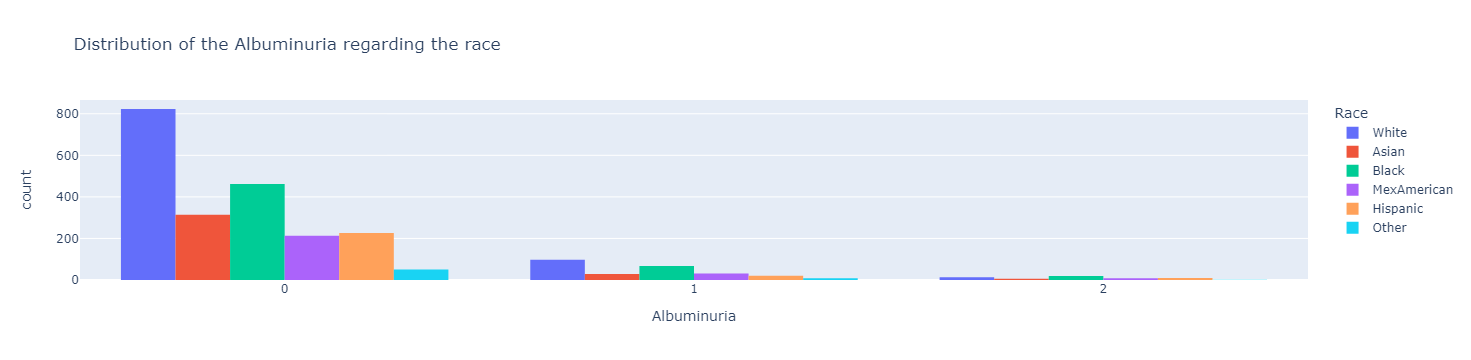

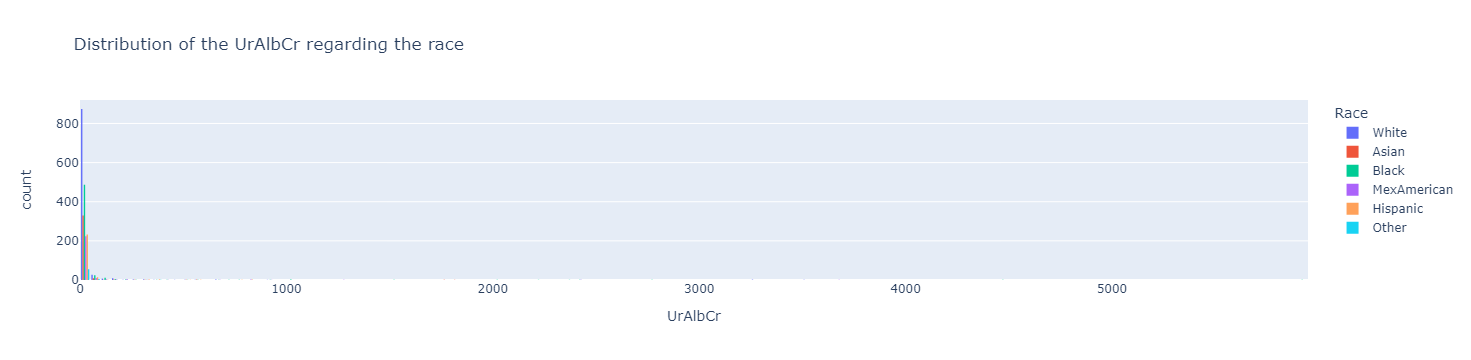

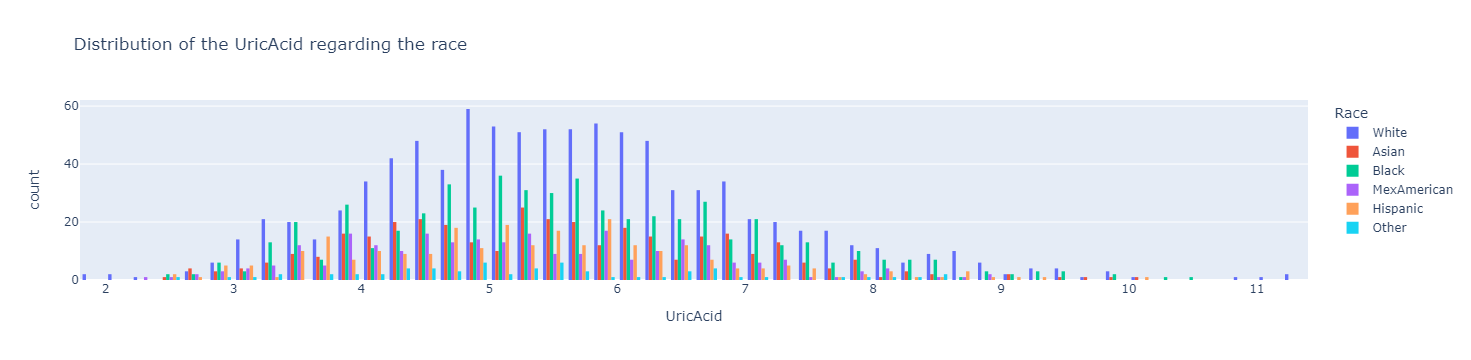

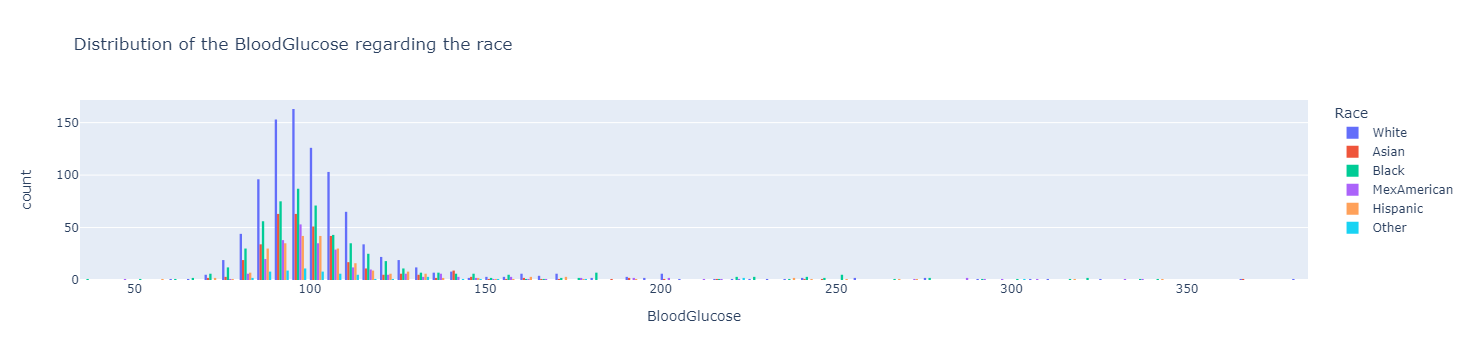

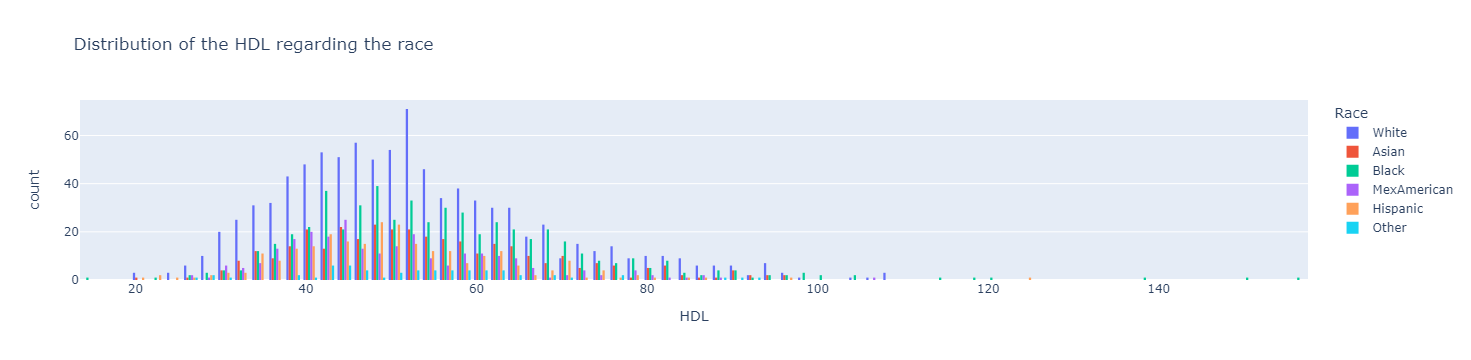

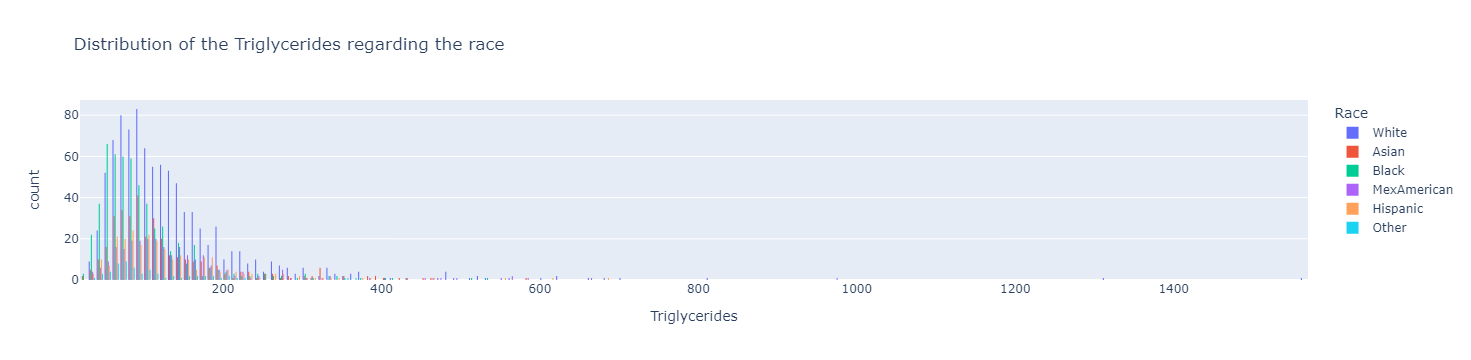

In [4]:
for column in data.select_dtypes(include="number"):
    px.histogram(data_frame=data, x= column, color="Race", barmode="group", title = f"Distribution of the {column} regarding the race").show()

##### Pie 

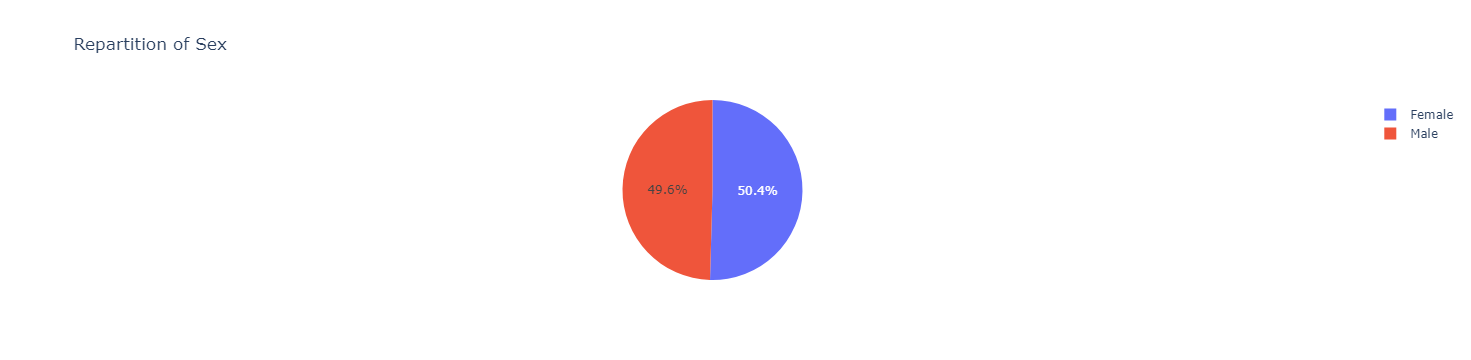

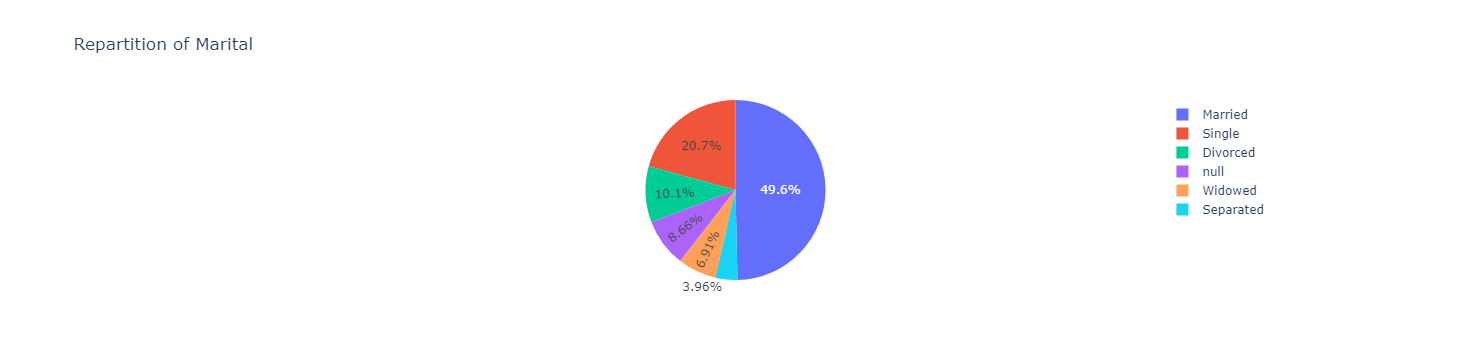

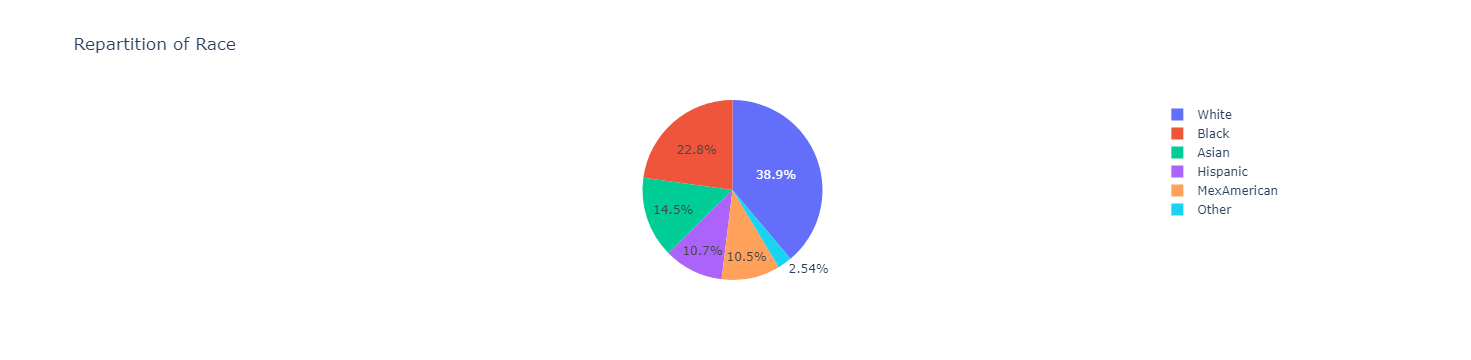

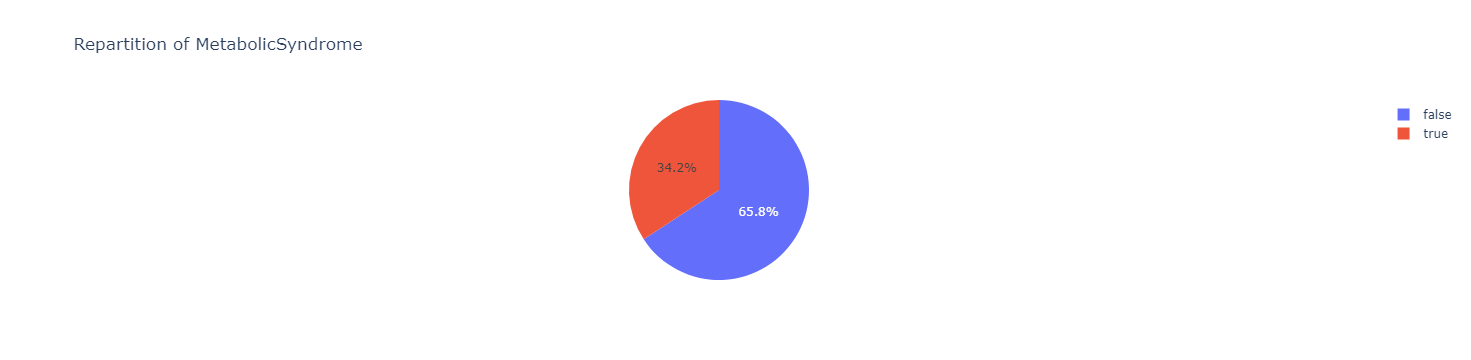

In [5]:
for column in data.select_dtypes(exclude="number").columns:
    px.pie(data_frame=data, names=column, title=f"Repartition of {column}").show()

##### Scatter plots

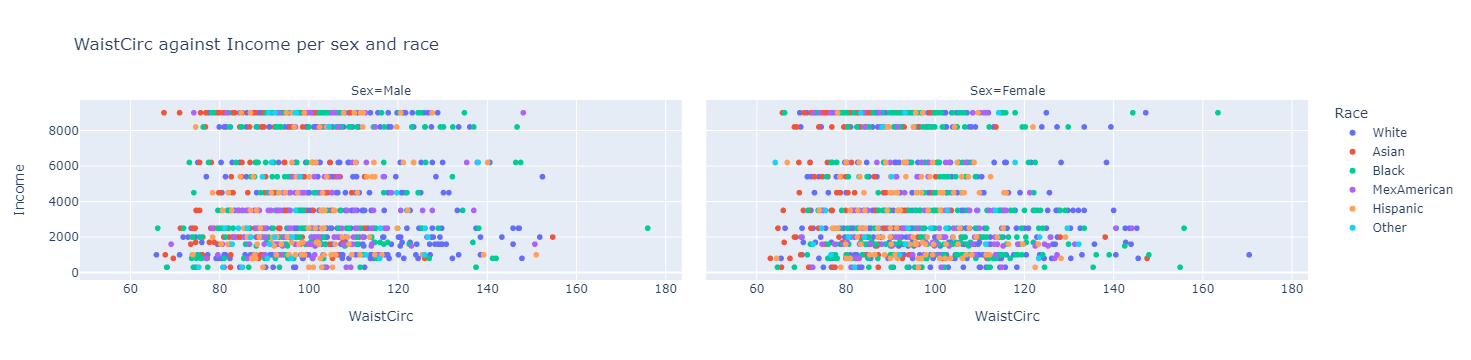

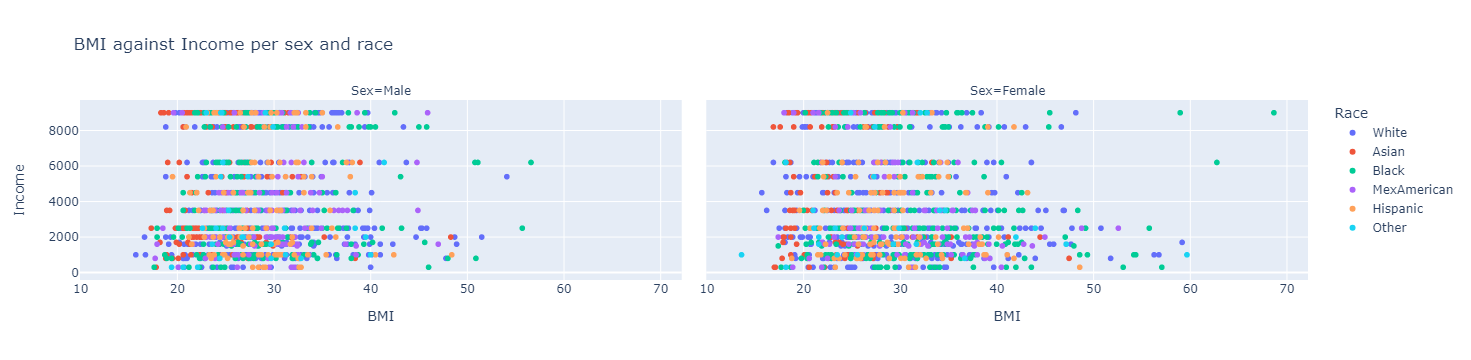

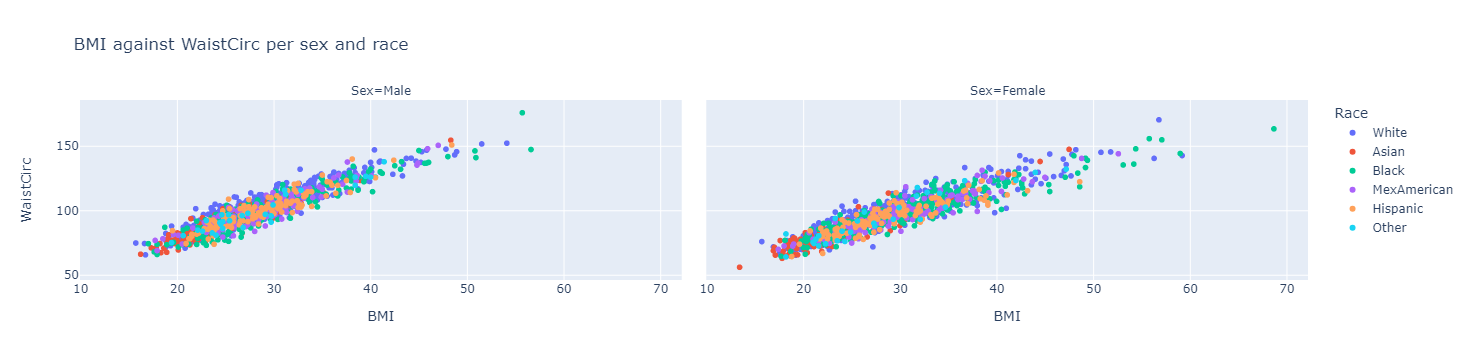

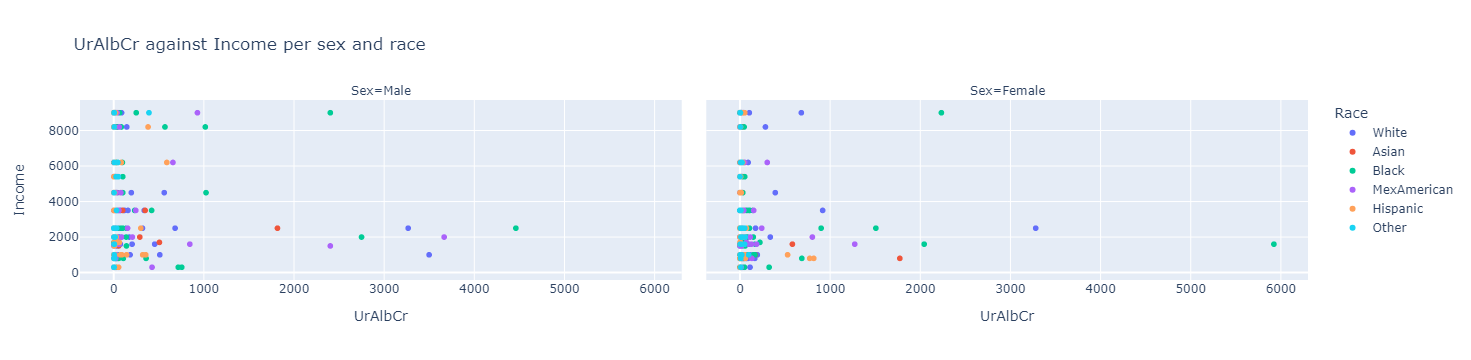

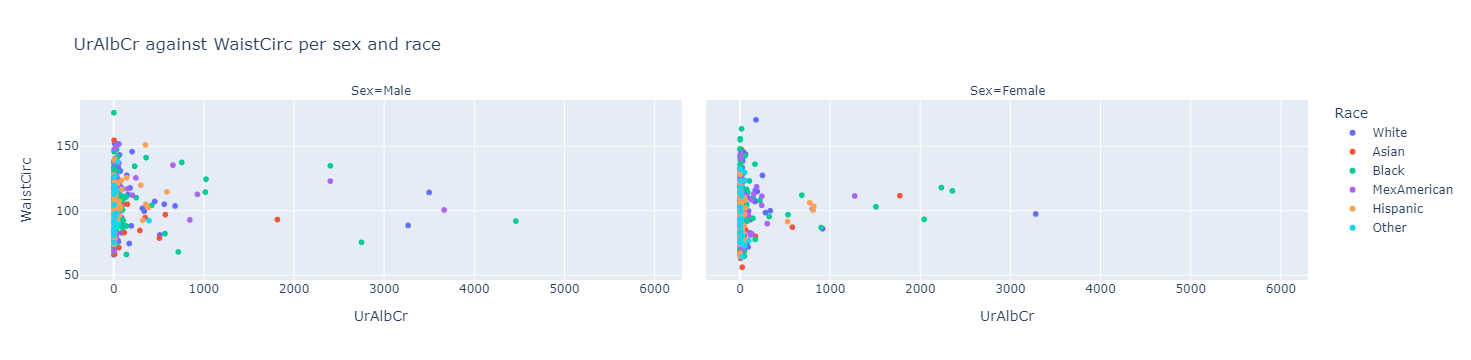

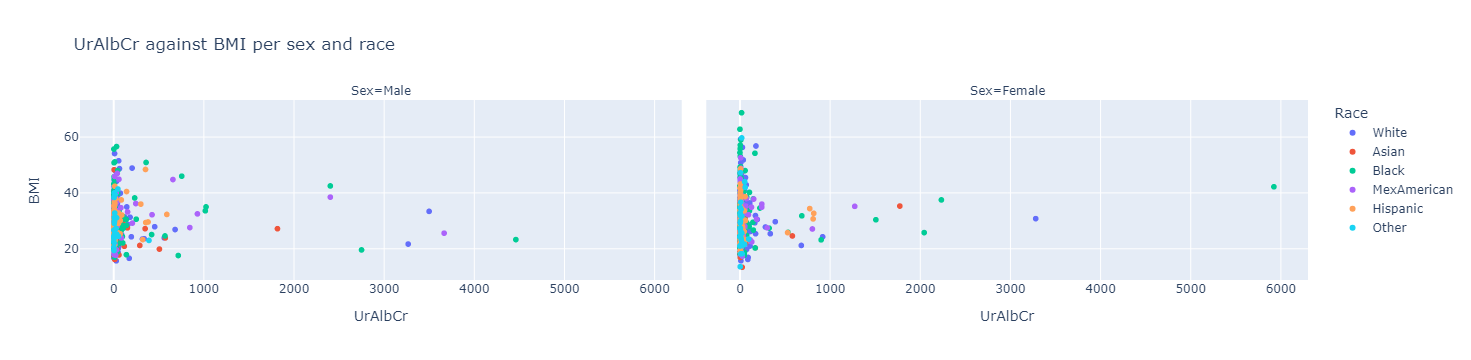

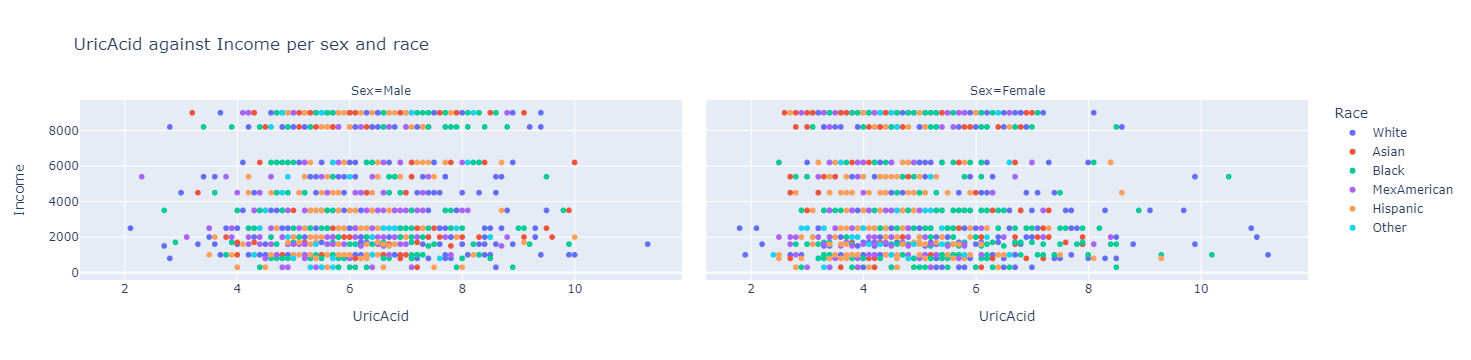

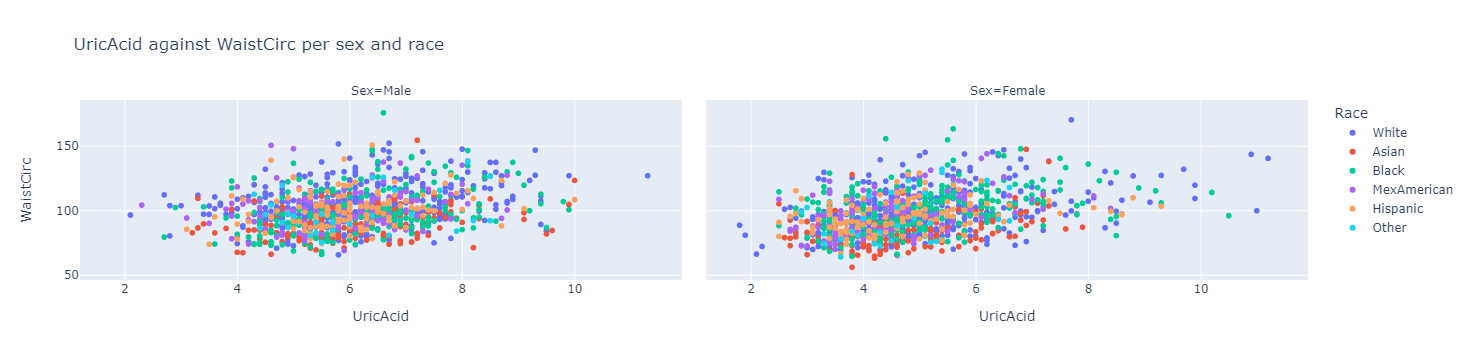

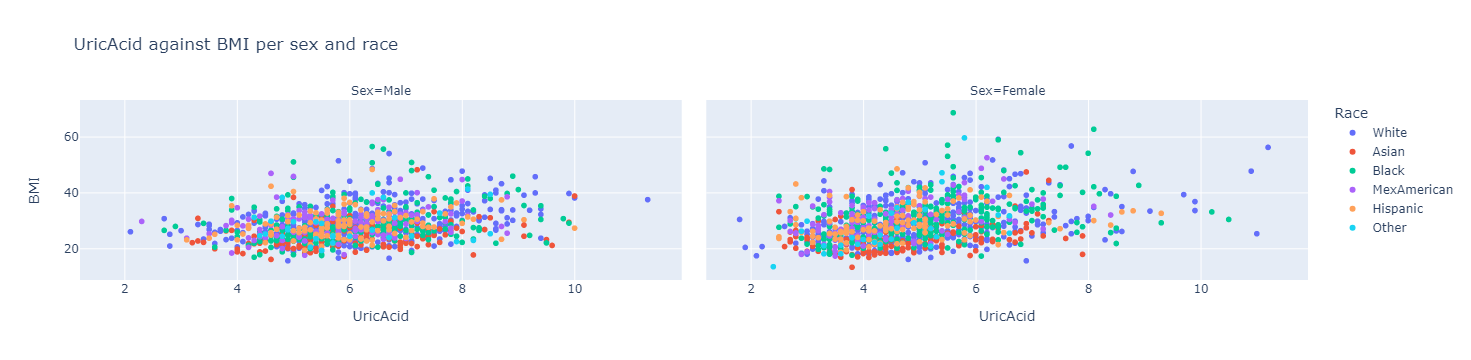

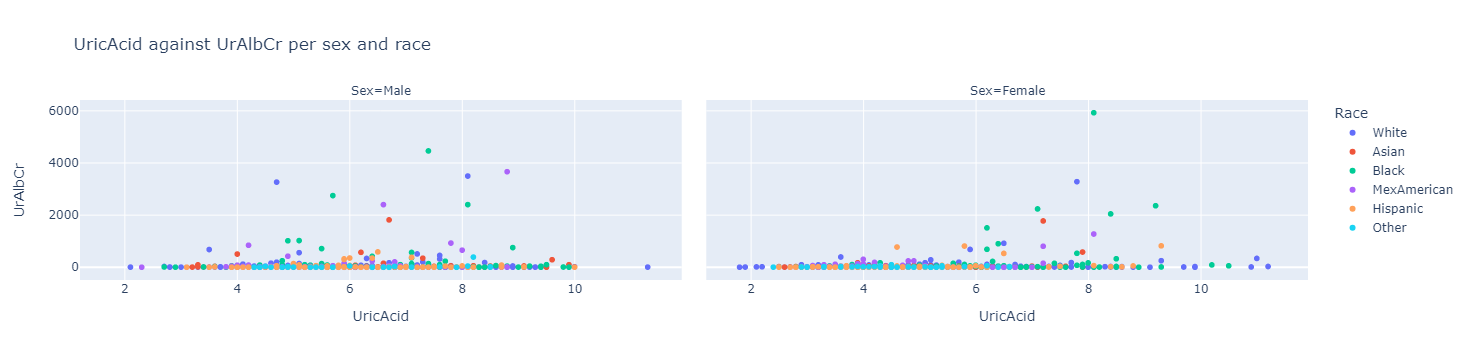

In [15]:
data_float64 = data.select_dtypes(include="float64")
for column_i in data_float64.columns:
    for column_j in data_float64.columns:
        if column_i != column_j and list(data_float64.columns).index(column_i)>=list(data_float64.columns).index(column_j):
            px.scatter(data_frame=data, x=column_i, y=column_j, color="Race", facet_col="Sex", title=f"{column_i} against {column_j} per sex and race").show()

##### Plots

In [12]:
for column in data.select_dtypes(include="int64"):
    px.histogram(data_frame=data, x= column, color="Race", barmode="group", title = f"Distribution of the {column} regarding the race", nbins=50).show()